Undersampling vs Oversampling

In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

SMOTE

SMOTE is only applied to training data

In [1]:
#dataframe manipulation
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [2]:
df=pd.read_excel("CleanData.xlsx")
df.head(3)

,Age,GDP,DelayInReporting,AccidentArea_Urban,Sex_Male,Fault_Third Party,BasePolicy_Collision,BasePolicy_Liability,VehicleCategory_Sport,VehicleCategory_Utility,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,PoliceReportFiled_Yes,WitnessPresent_Yes,FraudFound_P
0,21,7455,31,1,0,0,0,1,1,0,0,0,1,0,0,0
1,34,7115,0,1,1,0,1,0,1,0,0,0,1,1,0,0
2,47,7455,31,1,1,0,1,0,1,0,0,0,0,0,0,0


In [3]:
print(df.shape)

(15420, 16)


In [4]:
df.dtypes

Age                               int64
GDP                               int64
DelayInReporting                  int64
AccidentArea_Urban                int64
Sex_Male                          int64
Fault_Third Party                 int64
BasePolicy_Collision              int64
BasePolicy_Liability              int64
VehicleCategory_Sport             int64
VehicleCategory_Utility           int64
PastNumberOfClaims_2 to 4         int64
PastNumberOfClaims_more than 4    int64
PastNumberOfClaims_none           int64
PoliceReportFiled_Yes             int64
WitnessPresent_Yes                int64
FraudFound_P                      int64
dtype: object

In [5]:
cols = ['Age', 'GDP', 'DelayInReporting', 'AccidentArea_Urban', 'Sex_Male', 'Fault_Third Party', 'BasePolicy_Collision',
         'BasePolicy_Liability', 'VehicleCategory_Sport', 'VehicleCategory_Utility', 'PastNumberOfClaims_2 to 4',
         'PastNumberOfClaims_more than 4', 'PastNumberOfClaims_none', 'PoliceReportFiled_Yes', 'WitnessPresent_Yes']

In [6]:
#split data into x and y
#also make x into a numpy array so it can be fit onto the model
x =  df[cols].values
x

y = df['FraudFound_P']
y

print(x.shape)
print(y.shape)

(15420, 15)
(15420,)


In [7]:
#hold out validation technique - 70-20-10
#train model on 70, test on 20
from sklearn.model_selection import train_test_split
#test data
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=7, stratify=y)

#after hyperparameter tuning - and after best parameters
x_train, x_valid, y_train, y_valid =  train_test_split(x_train, y_train, train_size=0.9, test_size=0.1, random_state=7)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(9714, 15)
(4626, 15)
(1080, 15)
(9714,)
(4626,)
(1080,)


SMOTE Technique

In [8]:
from imblearn.over_sampling import SMOTE
from collections import Counter


counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 9120, 1: 594})
After Counter({0: 9120, 1: 9120})


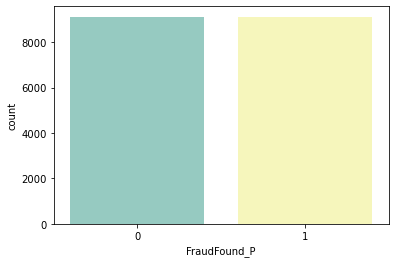

In [9]:
#is the databalanced? - now  balanced
ax =  sns.countplot(x=y_train_sm, palette="Set3")

Logistic Regression

In [10]:
#Build model
logreg = LogisticRegression(random_state=10, solver='lbfgs')
logreg.fit(X_train_sm, y_train_sm)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [11]:
#make predictions
logreg.predict(X_train_sm)
y_pred = logreg.predict(X_train_sm)

#probabilities
pred_proba = logreg.predict_proba(X_train_sm)

logreg.coef_

array([[-2.20770818e-02,  4.77611583e-04, -5.42060067e-03,
        -5.80533051e-01, -1.20431720e-01, -2.95017453e+00,
        -1.36037460e+00, -3.22386141e+00, -3.16614979e+00,
        -3.91944148e-01, -1.39342201e+00, -1.38229799e+00,
        -1.65043022e+00, -4.01280730e-01, -8.66648762e-02]])

In [12]:
#evaluate model
#on training set
print("The training Accuracy is: ", logreg.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", logreg.score(x_test, y_test))

#classification report
print(classification_report(y_train_sm, y_pred))

#roc_auc
print("AUCROC:",roc_auc_score(y_train_sm, pred_proba[:,1]))

The training Accuracy is:  0.8287828947368421
The test Accuracy is:  0.7775616083009079
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      9120
           1       0.80      0.88      0.84      9120

    accuracy                           0.83     18240
   macro avg       0.83      0.83      0.83     18240
weighted avg       0.83      0.83      0.83     18240

AUCROC: 0.9015077836449676


In [13]:
#confusion matrix to show how well the model predicts each class
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

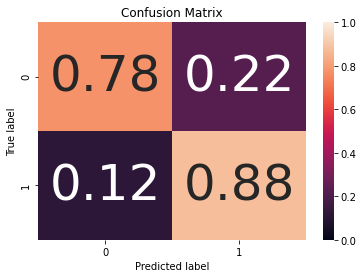

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_sm, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm,classes=logreg.classes_, title='Confusion Matrix')

In [15]:
cm

array([[7072, 2048],
       [1075, 8045]])

In [16]:
#EVALUATE METRICS
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#calculate the sensitivity, hit rate, recall or true positive rate
TPR = TP/ (TP + FN)
print("True Positive Rate is:",TPR)

PPV = TP / (TP + FP)
print("Precision is:",PPV)


print("Average TPR is:", TPR.sum()/2)
print("Average PPV is:", PPV.sum()/2)

True Positive Rate is: [0.7754386  0.88212719]
Precision is: [0.86804959 0.79708709]
Average TPR is: 0.8287828947368421
Average PPV is: 0.8325683394340575


In [17]:
#Log Loss - log loss went up for unseen data. this is good
from sklearn.metrics import log_loss
print("The log loss on Training is: ", log_loss(y_train_sm,pred_proba))

pred_proba_t = logreg.predict_proba(x_test)

print("The log loss on Test is: ", log_loss(y_test,pred_proba_t))

The log loss on Training is:  0.39183076916200243
The log loss on Test is:  0.42490584370152124


Random Forest New

It replaces any features it doesnt need 

In [18]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train_sm, y_train_sm)

y_pred_rf = rf.predict(X=X_train_sm)


The training Accuracy is:  0.9758771929824561
The test Accuracy is:  0.8778642455685257


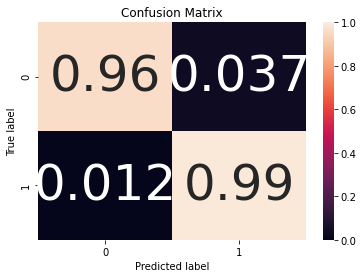

In [19]:
print("The training Accuracy is: ", rf.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", rf.score(x_test, y_test))


cm = confusion_matrix(y_train_sm, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm_norm

plot_confusion_matrix(cm_norm,classes=rf.classes_, title='Confusion Matrix')

In [20]:
#Tune Random Forest

Classification accuracy on the test set with max features = 1 and max_depth = None: 0.880
Classification accuracy on the test set with max features = 1 and max_depth = 2: 0.661
Classification accuracy on the test set with max features = 1 and max_depth = 3: 0.699
Classification accuracy on the test set with max features = 1 and max_depth = 4: 0.690
Classification accuracy on the test set with max features = 1 and max_depth = 5: 0.724
Classification accuracy on the test set with max features = sqrt and max_depth = None: 0.879
Classification accuracy on the test set with max features = sqrt and max_depth = 2: 0.638
Classification accuracy on the test set with max features = sqrt and max_depth = 3: 0.689
Classification accuracy on the test set with max features = sqrt and max_depth = 4: 0.675
Classification accuracy on the test set with max features = sqrt and max_depth = 5: 0.714
Classification accuracy on the test set with max features = log2 and max_depth = None: 0.879
Classification a

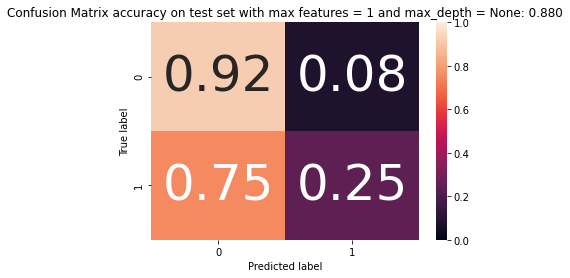

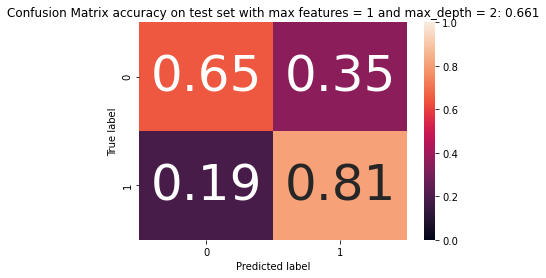

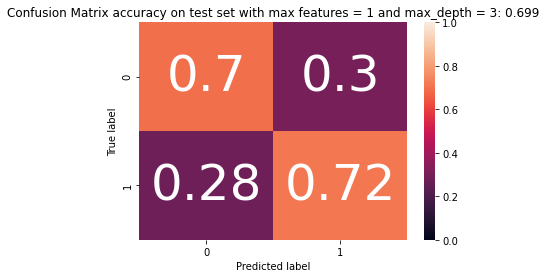

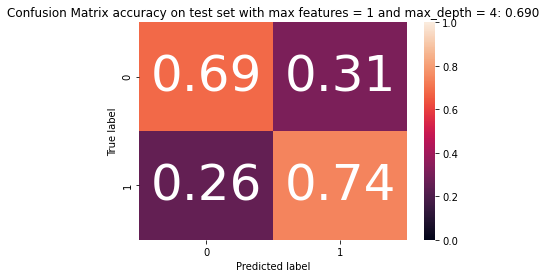

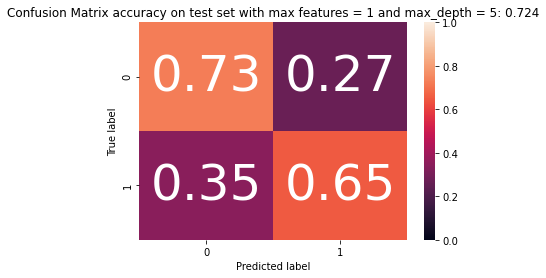

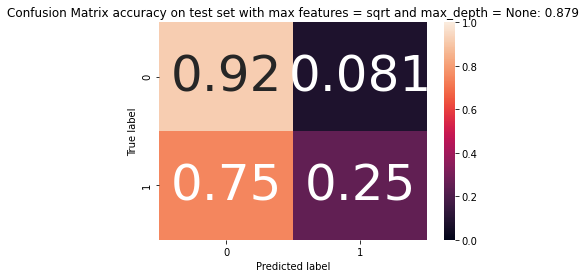

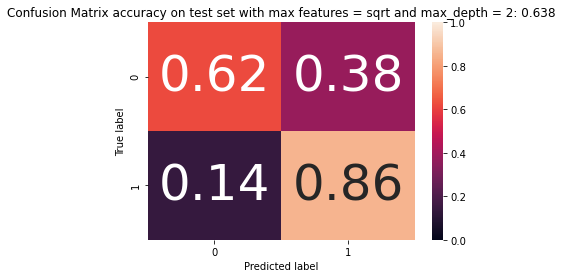

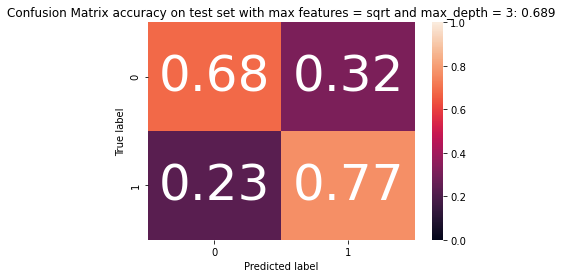

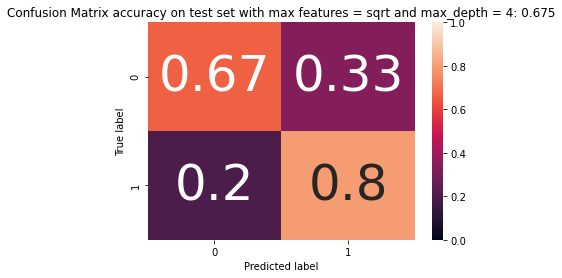

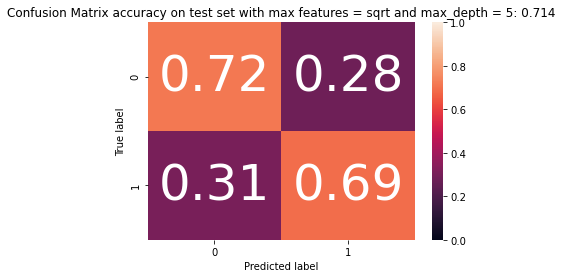

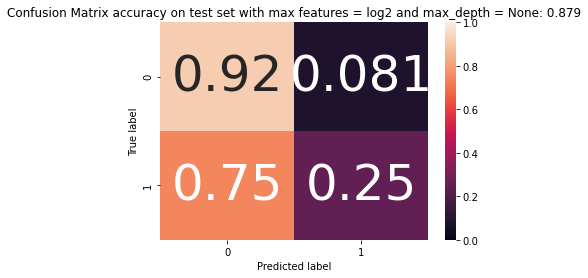

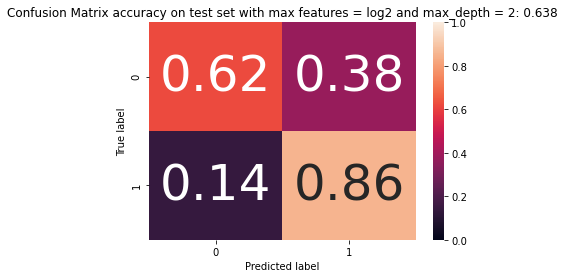

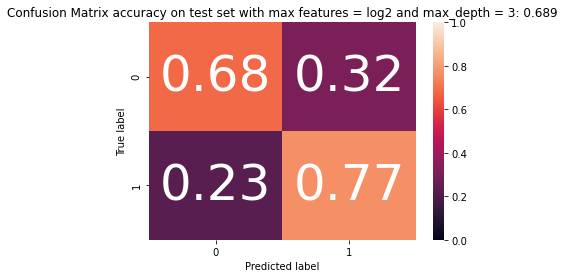

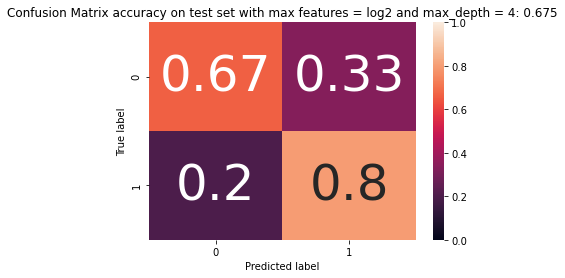

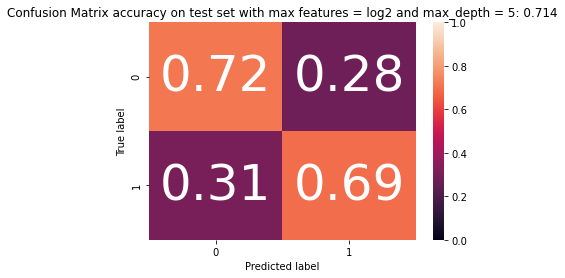

In [21]:
from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths):
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                criterion='entropy',
                                max_features=f,
                                max_depth=d,
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train_sm, y_train_sm)
    prediction_test = rf.predict(X=x_test)
    print('Classification accuracy on the test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm,classes=rf.classes_,
     title='Confusion Matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [22]:
#take the parameters with best prediction- run indivdual random forest tree

log 2 and max depth=2: 0.647

XGBOOST

In [23]:
X = df.drop('FraudFound_P', axis=1).values
Y = df['FraudFound_P'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X shape: (15420, 15)
Y shape: (15420,)


In [24]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier()

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

#provides the best possible parameters
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)

# fitting it
clf.fit(X_train_sm,y_train_sm)

# best parameters
# clf.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[21:54:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.935 total time=   0.5s
[21:54:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.974 total time=   0.6s
[21:54:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.972 total time=   0.6s
[21:54:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.974 total time=   0.5s
[21:54:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.973 total time=   0.5s
[21:54:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.921 total time=   0.7s
[21:54:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.966 total time=   0.8s
[21:54:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.964 total time=   0.6s
[21:54:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.964 total time=   0.7s
[21:54:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.964 total time=   0.8s
[21:54:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.924 total time=   0.4s
[21:54:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.967 total time=   0.5s
[21:54:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.964 total time=   0.4s
[21:54:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.964 total time=   0.4s
[21:54:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.965 total time=   0.4s
[21:54:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.917 total time=   0.3s
[21:54:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.962 total time=   0.3s
[21:54:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.960 total time=   0.4s
[21:54:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.960 total time=   0.3s
[21:54:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.960 total time=   0.3s
[21:54:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.913 total time=   0.4s
[21:54:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.960 total time=   0.4s
[21:54:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.960 total time=   0.5s
[21:54:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.958 total time=   0.4s
[21:54:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.958 total time=   0.4s
[21:54:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [25]:
#roc_auc is the ideal point between - predict more fraud correctly

In [26]:
# best parameters
clf.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [27]:
#derive model with best parameter
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
final = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
final.fit(X_train_sm, y_train_sm)

train_xgboost = final.predict(X_train_sm)

pred_xgboost = final.predict(x_test)


[21:55:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


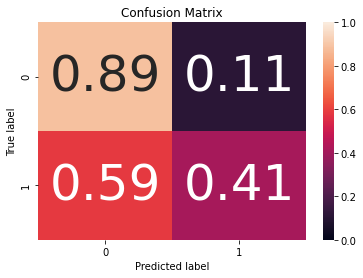

In [29]:

# Confusion Matrix
cm = confusion_matrix(y_test, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=final.classes_)

Doesnt work well with imbalanced data

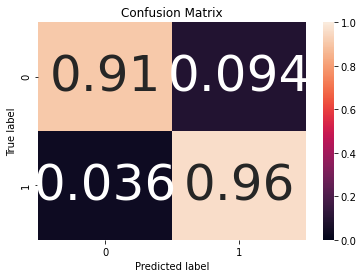

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_train_sm, train_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=final.classes_)

In [52]:
#compare roc for all models - CHANGE TO TEST!!

In [48]:
from sklearn import metrics


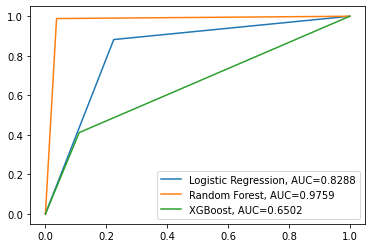

In [51]:
plt.figure(0).clf()

#logreg
fpr, tpr, _ = metrics.roc_curve(y_train_sm, y_pred)
auc = round(metrics.roc_auc_score(y_train_sm, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#rf

fpr, tpr, _ = metrics.roc_curve(y_train_sm, y_pred_rf)
auc = round(metrics.roc_auc_score(y_train_sm, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


#xgboost
fpr, tpr, _ = metrics.roc_curve(y_test, pred_xgboost)
auc = round(metrics.roc_auc_score(y_test, pred_xgboost), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

plt.legend()

Feature: 0, Score: -0.02208
Feature: 1, Score: 0.00048
Feature: 2, Score: -0.00542
Feature: 3, Score: -0.58053
Feature: 4, Score: -0.12043
Feature: 5, Score: -2.95017
Feature: 6, Score: -1.36037
Feature: 7, Score: -3.22386
Feature: 8, Score: -3.16615
Feature: 9, Score: -0.39194
Feature: 10, Score: -1.39342
Feature: 11, Score: -1.38230
Feature: 12, Score: -1.65043
Feature: 13, Score: -0.40128
Feature: 14, Score: -0.08666


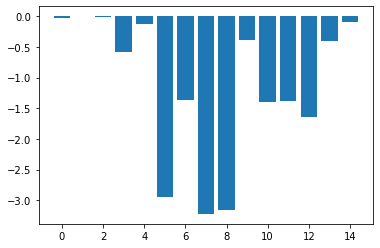

In [32]:
#FEATURE IMPORTANCE
from matplotlib import pyplot

# logistic regression for feature importance
# get importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [33]:
#random forest
rf.feature_importances_

array([0.01396264, 0.02119718, 0.0044145 , 0.01042511, 0.00172024,
       0.21055691, 0.04945   , 0.27154585, 0.22752032, 0.01181462,
       0.07328496, 0.04861952, 0.03866737, 0.01610211, 0.00071866])

In [35]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)

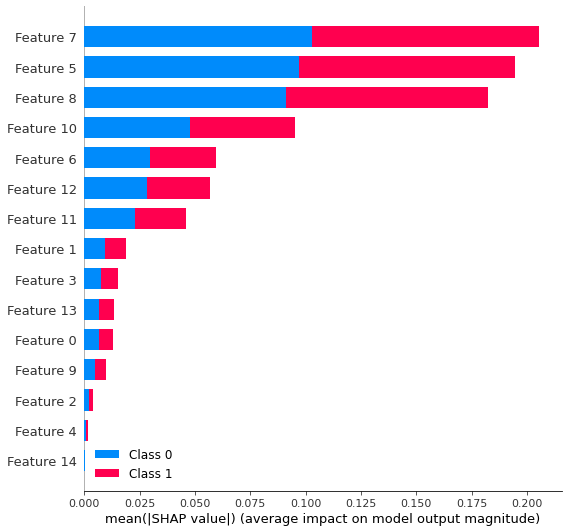

In [36]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [46]:
explainer2 = shap.TreeExplainer(final)
shap_values = explainer2.shap_values(x_test)

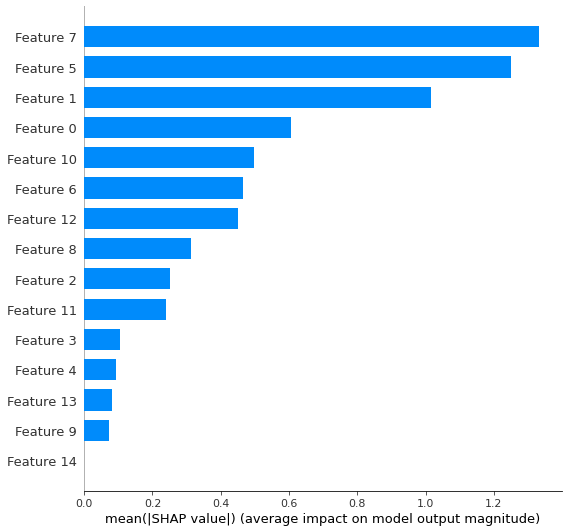

In [47]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

Random Forest

In [18]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

In [19]:
clf_RF = RandomForestClassifier(random_state=42)

clf_RF.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [20]:
#make predictions
clf_RF.predict(X_train_sm)
y_pred_rf = clf_RF.predict(X_train_sm)

#probabilities
pred_proba_rf = clf_RF.predict_proba(X_train_sm)

In [21]:
#evaluate model
#on training set
print("The training Accuracy is: ", clf_RF.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", clf_RF.score(x_test, y_test))

#classification report
print(classification_report(y_train_sm, y_pred_rf))

#roc_auc
print("AUCROC:",roc_auc_score(y_train_sm, pred_proba_rf[:,1]))

The training Accuracy is:  0.9770833333333333
The test Accuracy is:  0.8767833981841764
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      9120
           1       0.97      0.99      0.98      9120

    accuracy                           0.98     18240
   macro avg       0.98      0.98      0.98     18240
weighted avg       0.98      0.98      0.98     18240

AUCROC: 0.9968692169706062


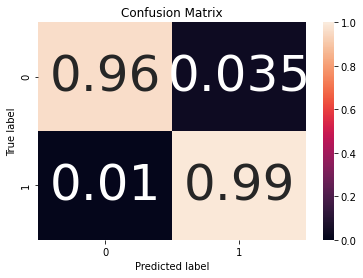

In [22]:
#confusion matrix for random forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_sm, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm_norm
#no incorrect predictions? 

plot_confusion_matrix(cm_norm,classes=clf_RF.classes_, title='Confusion Matrix')

Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=42)

In [24]:
#make predictions
tree_model.predict(X_train_sm)
y_pred_dt = tree_model.predict(X_train_sm)

#probabilities
pred_proba_dt = tree_model.predict_proba(X_train_sm)

In [25]:
#evaluate model
#on training set
print("The training Accuracy is: ", tree_model.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", tree_model.score(x_test, y_test))

#classification report
print(classification_report(y_train_sm, y_pred_dt))

#roc_auc
print("AUCROC:",roc_auc_score(y_train_sm, pred_proba_dt[:,1]))

The training Accuracy is:  0.9770833333333333
The test Accuracy is:  0.8672719412019023
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9120
           1       0.97      0.98      0.98      9120

    accuracy                           0.98     18240
   macro avg       0.98      0.98      0.98     18240
weighted avg       0.98      0.98      0.98     18240

AUCROC: 0.9978244688269466


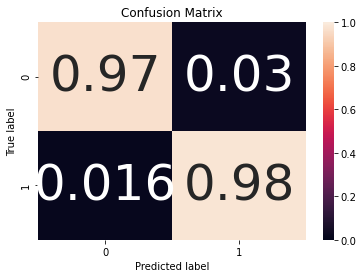

In [26]:
#confusion matrix for random forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_sm, y_pred_dt)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm_norm
#no incorrect predictions? 

plot_confusion_matrix(cm_norm,classes=tree_model.classes_, title='Confusion Matrix')

Compare performance of models

In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

In [32]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [42]:
    model.append(algo)
    precision.append(precision_score(y_train_sm,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

In [48]:

clf_eval_df


,model,resample,precision,recall,f1-score,AUC-ROC


In [ ]:
#evaluate model
#on training set
print("The training Accuracy is: ", logreg.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", logreg.score(x_test, y_test))

#classification report
print(classification_report(y_train_sm, y_pred))

#roc_auc
print("AUCROC:",roc_auc_score(y_train_sm, pred_proba[:,1]))


#evaluate model
#on training set
print("The training Accuracy is: ", clf_RF.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", clf_RF.score(x_test, y_test))

#classification report
print(classification_report(y_train_sm, y_pred_rf))

#roc_auc
print("AUCROC:",roc_auc_score(y_train_sm, pred_proba_rf[:,1]))




#evaluate model
#on training set
print("The training Accuracy is: ", tree_model.score(X_train_sm, y_train_sm))

#test the model on unseen data - higher accuracy than training data?
print("The test Accuracy is: ", tree_model.score(x_test, y_test))

#classification report
print(classification_report(y_train_sm, y_pred_dt))

#roc_auc
print("AUCROC:",roc_auc_score(y_train_sm, pred_proba_dt[:,1]))

In [33]:
models = [logreg,clf_RF,tree_model]



https://www.kaggle.com/code/jhskaggle/l09-model-selection-and-hyperparameter/notebook 


Hyperparameter training

In [1]:
#tree based feature importance

In [35]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT2 = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT2.fit(X_train_sm, y_train_sm)

print("The CA is:", clf_DT2.score(x_test, y_test))
pred_proba_t = clf_DT2.predict_proba(x_test)

print("The optimal c is: ", clf_DT2.best_estimator_)
#clf_DT2.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The CA is: 0.7895868837435553
The optimal c is:  DecisionTreeClassifier(max_depth=15, min_samples_split=100)


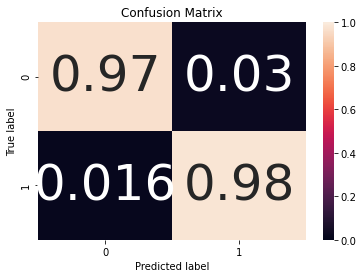

In [38]:
#confusion matrix for random forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_sm, y_pred_dt)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm_norm
#no incorrect predictions? 

plot_confusion_matrix(cm_norm,classes=clf_DT2.classes_, title='Confusion Matrix')

In [ ]:
logreg4 = LogisticRegression(random_state=10, solver='lbfgs',C=29763.514416)
logreg4.fit(x_train, y_train)
score =  logreg4.score(x_valid, y_valid)

pred_proba_t = logreg4.predict_proba(x_valid)
log_loss2 = log_loss(y_valid,pred_proba_t)


print("Testing Accuracy:", score) 